In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1 (毛亦嘉)

<font size = 4 color = black face = "Times New Roman"> Here in this problem I choose to use `numpy.random.uniform` as the number generator and repeat the process three times.

In [4]:
for times in range(5):
    A = []
    for i in range(100000):
        A.append(np.random.uniform(-1,1,27).sum())
    n_1 = n_2 =n_3 =0
    sigma = np.std(A) 
    # Here I choose to calculate sigma by myself so the result wiil be better, actually the result is very close to 3, 
    for i in A:
        if abs(i)< sigma:
            n_1 += 1
        if abs(i)<2*sigma:
            n_2 += 1
        if abs(i)<3*sigma:
            n_3 += 1
    print("Operation{}: average:{} standard deviation:{}".format(times+1,np.mean(A),np.std(A)) )
    print("Within 1 sigma:{:<10} Within 2 sigma:{:<10} Within 3 sigma:{}".format(n_1/100000, n_2/100000, n_3/100000))
    print("\n")

Operation1: average:0.006868358258462946 standard deviation:2.9958796366786675
Within 1 sigma:0.68085    Within 2 sigma:0.95463    Within 3 sigma:0.9977


Operation2: average:0.00441550251084771 standard deviation:3.0083372587201795
Within 1 sigma:0.68098    Within 2 sigma:0.95418    Within 3 sigma:0.99784


Operation3: average:0.020472109445892575 standard deviation:3.0022539115370113
Within 1 sigma:0.67984    Within 2 sigma:0.95555    Within 3 sigma:0.99774


Operation4: average:-0.0027559416359719422 standard deviation:2.9949686634290527
Within 1 sigma:0.68072    Within 2 sigma:0.95442    Within 3 sigma:0.99743


Operation5: average:-0.0037519798096689555 standard deviation:3.00950325367835
Within 1 sigma:0.68059    Within 2 sigma:0.95492    Within 3 sigma:0.99755




<font size = 4 color = black face = "Times New Roman"> From the results above, we can find that the average value and standard deviation of the 5 operation are very close to 0 and 3 respectively. Besides, the the proportions within $\sigma$, 2$\sigma$ and 3$\sigma$ from the mean (all the 5 sets of results) are very close to the theoretical value 0.6826, 0.9545 and 0.9973 but there still exists little error. That's because though the sample is very large, it's not large ernough to allow the value calculated to match the theoretical value within 5 decimal points. Larger samples will improve the results, but actually real tests can only approximate, not reach the ideal value. Besides, the uniform random number is itself not so accurate.

### Problem 2 (毛亦嘉)

<font size = 4 color = black face = "Times New Roman"> 
Firstly, we have to do the normalization for the distribution function, so
$$
\int_0^1 A\dfrac{1}{2}sin({\pi}x)d{x} = 1
$$    
As a result,
$$
A = \pi
$$
    
    Applying the inverse transformation, we have
$$
P(x) = \int_0^x Ap(\xi)d{\xi} = \int_0^x \dfrac{\pi}{2}sin({\pi}\xi){d\xi} =\dfrac{1}{2}(1-cos{\pi}x) = y, x\in [0,1]
$$
Therefore, we have
 $$
x= \dfrac{1}{\pi}arccos(1-2y), y\in [0,1]
$$

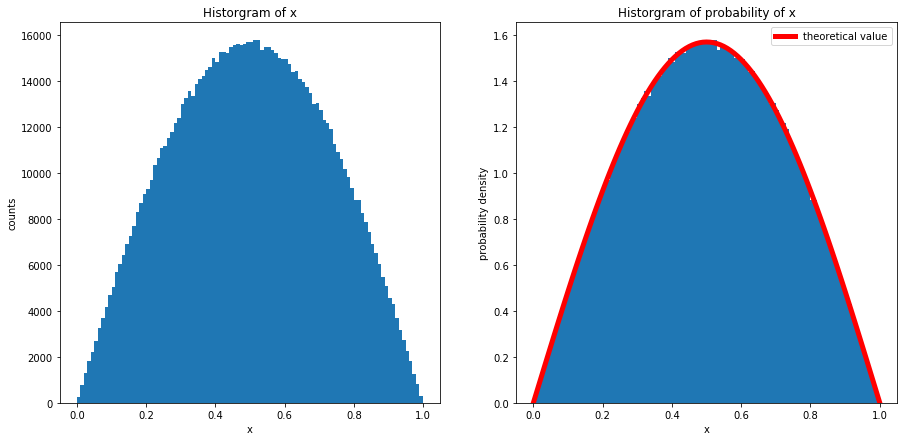

In [28]:
y = np.random.uniform(0,1,1000000) # Genereate standard uniform distribution numbers in range [0, 1/pi]
x = (1/np.pi) *np.arccos(1-2*y)
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].hist(x,100)
ax[0].set_title('Historgram of x')
ax[0].set_xlabel('x')
ax[0].set_ylabel('counts')
n,bins,patches = ax[1].hist(x,100,density = True)
ax[1].set_title('Historgram of probability of x')
ax[1].set_xlabel('x')
ax[1].set_ylabel('probability density')
p = np.pi/2 * np.sin(np.pi*bins)
ax[1].plot(bins,p,'r',linewidth = 5.0,label = 'theoretical value')
ax[1].legend()
plt.show()

<font size = 4 color = black face = "Times New Roman"> 
From the graph, we can find that the result from the inverse transformation method agrees with the theoretical value well.

### Problem 3 (毛亦嘉)

<font size = 4 color = black face = "Times New Roman"> Here we set 0 as the original point and we use "+1" and "-1" to show going right or going left ("+1" corresponds to going right, "-1" corresponds to going left). We also use a variable "sign" which is a random number between 0 and 1. Since $p_{left} = 0.25$ and $p_{right} = 0.75$, if $0 \leq sign < 0.25$, we let it go left, and if $0.25 \leq sign <1$, we let the point go right. Firstly, let's do a random walk with step 1000.

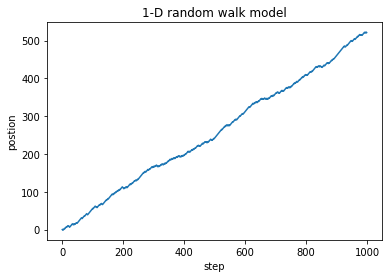

In [6]:
y_0 = 0
position = [y_0]
N = np.arange(1000) # Choose the step of the random walk as 10000
for step in range(1,1000): # N = 0 corresponds to y_0
    sign = np.random.rand(1) # Set a random number between 0 and 1
    if 0<=sign<0.25: # The probability to go left
        y_0 -= 1
    if 0.25<=sign<1: # The probability to go right
        y_0 += 1
    position.append(y_0)
plt.plot(N,position)
plt.xlabel('step')
plt.ylabel('postion')
plt.title('1-D random walk model')
plt.show()

<font size = 4 color = black face = "Times New Roman"> We can find that though the result has some fluctuation, the random walk generally goes to right(since $p_{left} < p_{right}$). Then we repeat the result for multiple times with different number of steps to check whether the final position is diffusive.

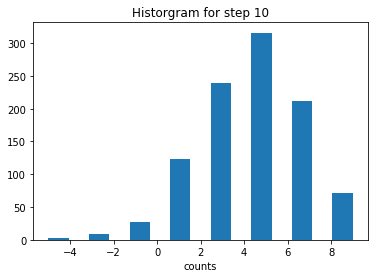

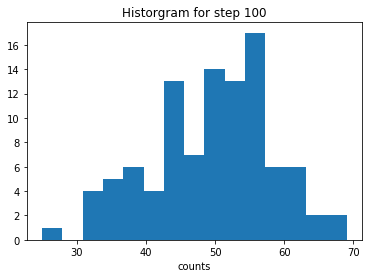

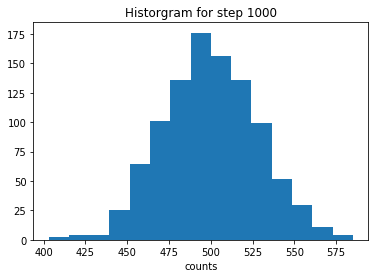

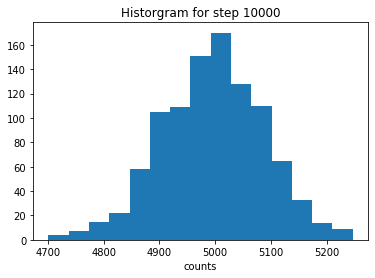

In [23]:
final_position = []
for times in range(1000):
    y_0 =0
    for step in range(1,10): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 10')
plt.show()

final_position = []
for times in range(100):
    y_0 =0
    for step in range(1,100): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 100')
plt.show()

final_position = []
for times in range(1000):
    y_0 =0
    for step in range(1,1000): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 1000')
plt.show()

final_position = []
for times in range(1000):
    y_0 =0
    for step in range(1,10000): # Choose the step of the random walk as 10000, N = 0 corresponds to y_0
        sign = np.random.rand(1) # Set a random number between 0 and 1
        if 0<=sign<0.25: # The probability to go left
            y_0 -= 1
        if 0.25<=sign<1: # The probability to go right
            y_0 += 1
    final_position.append(y_0)
plt.hist(final_position,15)
plt.xlabel('final position')
plt.xlabel('counts')
plt.title('Historgram for step 10000')
plt.show()

<font size = 4 color = black face = "Times New Roman"> From the four graphs above, we can find that though it generally goes to right, the results for the final position is still diffusive. The inequality in step directions actually causes a drift in the distribution shown above, from the most probable final position, which is about 5, 50, 500 and 5000 corresponding to step N =10, 100, 1000 and 10000, we can find that the drift is propotional to the number of steps and the coefficient is related to the difference of the probability of two step directions.